In [1]:
import numpy as np
import scipy
from scipy import stats
import pandas as pd
import os
import xlrd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('result_cleaned.xlsx')

In [173]:
#df that only inluded experimental sentences
df_exp = df[df['condition'] != 1000]

In [174]:
#df that only inludes behaviral responses
df_behavior = df[df['type'] == 0]

In [175]:
#extract the response times for critical words
q1 = (df['question_number'] == 1) & (df['word_token'] == 7)
df1 = df[q1]

df1 = df1.append(df[(df['question_number'] == 2) & (df['word_token'] == 7)])
df1 = df1.append(df[(df['question_number'] == 3) & (df['word_token'] == 7)])
df1 = df1.append(df[(df['question_number'] == 4) & (df['word_token'] == 8)])
df1 = df1.append(df[(df['question_number'] == 5) & (df['word_token'] == 9)])
df1 = df1.append(df[(df['question_number'] == 6) & (df['word_token'] == 9)])
df1 = df1.append(df[(df['question_number'] == 7) & (df['word_token'] == 13)])
df1 = df1.append(df[(df['question_number'] == 8) & (df['word_token'] == 10)])
df1 = df1.append(df[(df['question_number'] == 9) & (df['word_token'] == 9)])
df1 = df1.append(df[(df['question_number'] == 10) & (df['word_token'] == 9)])
df1 = df1.append(df[(df['question_number'] == 11) & (df['word_token'] == 8)])
df1 = df1.append(df[(df['question_number'] == 12) & (df['word_token'] == 6)])
df1 = df1.append(df[(df['question_number'] == 13) & (df['word_token'] == 11)])
df1 = df1.append(df[(df['question_number'] == 14) & (df['word_token'] == 6)])
df1 = df1.append(df[(df['question_number'] == 15) & (df['word_token'] == 6)])
df1 = df1.append(df[(df['question_number'] == 16) & (df['word_token'] == 6)])
df1 = df1.append(df[(df['question_number'] == 17) & (df['word_token'] == 8)])
df1 = df1.append(df[(df['question_number'] == 18) & (df['word_token'] == 10)])
df1 = df1.append(df[(df['question_number'] == 19) & (df['word_token'] == 11)])
df1 = df1.append(df[(df['question_number'] == 20) & (df['word_token'] == 10)])
df1 = df1.append(df[(df['question_number'] == 21) & (df['word_token'] == 7)])
df1 = df1.append(df[(df['question_number'] == 22) & (df['word_token'] == 6)])
df1 = df1.append(df[(df['question_number'] == 23) & (df['word_token'] == 7)])
df1 = df1.append(df[(df['question_number'] == 24) & (df['word_token'] == 7)])
df1 = df1.append(df[(df['question_number'] == 25) & (df['word_token'] == 6)])
df1 = df1.append(df[(df['question_number'] == 26) & (df['word_token'] == 10)])
df1 = df1.append(df[(df['question_number'] == 27) & (df['word_token'] == 15)])
df1 = df1.append(df[(df['question_number'] == 28) & (df['word_token'] == 7)])
df1 = df1.append(df[(df['question_number'] == 29) & (df['word_token'] == 10)])
df1 = df1.append(df[(df['question_number'] == 30) & (df['word_token'] == 9)])
df1 = df1.append(df[(df['question_number'] == 31) & (df['word_token'] == 6)])
df1 = df1.append(df[(df['question_number'] == 32) & (df['word_token'] == 8)])
df1 = df1.append(df[(df['question_number'] == 33) & (df['word_token'] == 8)])
df1 = df1.append(df[(df['question_number'] == 34) & (df['word_token'] == 9)])
df1 = df1.append(df[(df['question_number'] == 35) & (df['word_token'] == 12)])
df1 = df1.append(df[(df['question_number'] == 36) & (df['word_token'] == 7)])


In [176]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1260 entries, 192 to 26636
Data columns (total 11 columns):
type               1260 non-null int64
condition          1260 non-null int64
question_number    1260 non-null int64
index              1260 non-null int64
word_token         1260 non-null object
word               1260 non-null object
response_time      1260 non-null int64
cloze              1260 non-null float64
Unnamed: 8         1260 non-null object
Unnamed: 9         1260 non-null object
Unnamed: 10        0 non-null object
dtypes: float64(1), int64(5), object(5)
memory usage: 118.1+ KB
None


In [168]:
df1.to_excel('classifier_temp.xlsx')

In [8]:
#check response accuracy
a = df_behavior['response_time'].value_counts()
accuracy = a[1]/(a[0]+a[1])
print(accuracy)

0.8476190476190476


[524. 450. 140. ... 215. 579. 258.]


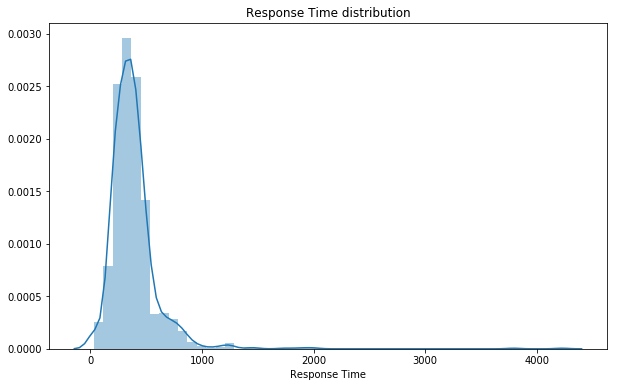

In [9]:
#plot distribution of response time
data = np.array(df1['response_time'],dtype=np.float32)
print(data)
plt.figure(figsize=(10, 6))
plt.title("Response Time distribution")
plt.xlabel("Response Time")
sns.distplot(data)

In [31]:
#response time within 1s
count = 0
for i in data:
    if (i < 1000)&(i>200):
        count += 1
print(count/data.shape[0])        

0.8873015873015873


In [32]:
df1["response_time"] = pd.to_numeric(df1["response_time"])

In [ ]:
#eliminate the trials with response time longer than 1000ms
a = ((df1['response_time'] < 1000) & (df1['response_time'] > 200)&(df1['pre_RT'] < 1000)&(df1['pre_RT'] > 200)&(df1['noun_RT'] < 1000) & (df1['noun_RT'] > 200))
df_eliminated = df1[a]
df_eliminated.info()

In [68]:
df_eliminated.shape[0]

1118

In [169]:
print(df_eliminated.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1118 entries, 192 to 26636
Data columns (total 11 columns):
type               1118 non-null int64
condition          1118 non-null int64
question_number    1118 non-null int64
index              1118 non-null int64
word_token         1118 non-null object
word               1118 non-null object
response_time      1118 non-null int64
cloze              1118 non-null float64
Unnamed: 8         1118 non-null object
Unnamed: 9         1118 non-null object
Unnamed: 10        0 non-null object
dtypes: float64(1), int64(5), object(5)
memory usage: 144.8+ KB
None


In [170]:
#average the response time by sentences 
average_RT = df_eliminated['response_time'].groupby(df_eliminated['index']).mean()


In [71]:
average_RT.to_excel('average.xlsx')

In [72]:
df_cloze = pd.read_excel('RTxCloze.xlsx')

In [73]:
df_cloze.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 4 columns):
trial            108 non-null int64
response_time    108 non-null float64
cloze            108 non-null float64
classifier       108 non-null object
dtypes: float64(2), int64(1), object(1)
memory usage: 3.5+ KB


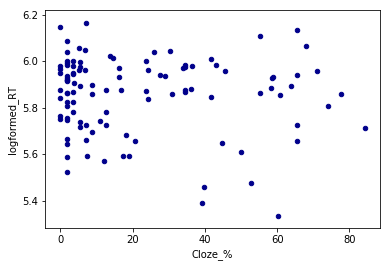

In [74]:
df_cloze['logformed_RT'] = df_cloze["response_time"].apply(np.log)
df_cloze['Cloze_%'] = df_cloze['cloze'].apply(lambda x: x*100)
df_cloze.plot.scatter(x='Cloze_%', y= 'logformed_RT', c='DarkBlue')

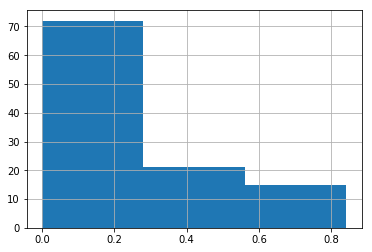

In [59]:
#plot distribution of cloze probability
hist = df_cloze['cloze'].hist(bins=3)

In [60]:

df_high = df_eliminated[df_eliminated['condition'] == 2000]
df_mid = df_eliminated[df_eliminated['condition'] == 3000]
df_low = df_eliminated[df_eliminated['condition'] == 4000]


In [61]:
df_high['response_time'].mean()
F, p = stats.f_oneway(df_high['response_time'], df_mid['response_time'], df_low['response_time'])

In [62]:
print(F, p)

0.119471872283768 0.8874047776380871


In [63]:
a = df_high['response_time'].mean()
b = df_mid['response_time'].mean()
c = df_low['response_time'].mean()
print(a,b,c)

444.9325842696629 447.2142857142857 441.68634686346866


In [64]:
a = df_cloze['trial'] < 2000
df_temp = df_cloze[a]
df_temp['response_time'].mean()

348.37863367569247